In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/UAS_DATA_MINING

/content/drive/MyDrive/UAS_DATA_MINING


## **1. Instalasi Library**

In [ ]:
# Cell 1: Instalasi Library yang Dibutuhkan
!pip install tensorflow==2.15.0 tf-keras==2.15.1 keras==2.15.0 numpy==1.26.4 protobuf==4.25.7 h5py==3.13.0 pandas==2.2.2 scikit-learn==1.6.1 keras-tuner==1.4.7 matplotlib==3.10.3 seaborn==0.13.2 tensorflowjs==4.22.0 kagglehub==0.3.12 split-folders==0.5.1 tensorflow-text==2.15.0 dopamine-rl==4.0.7 thinc==8.2.3 grpcio-status==1.59.0 grpcio==1.59.0 packaging==23.2 tensorflow-decision-forests==1.8.1 spacy==3.7.5 google-cloud-bigquery==3.17.0 ml-dtypes==0.2.0 wrapt==1.14.1 tensorboard==2.15.2 tensorflow-estimator==2.15.0 --upgrade --no-cache-dir
print("Instalasi library selesai.")

Instalasi library selesai.


In [ ]:
# Visualisasi dan Analisis Data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf

# Statistik & Preprocessing
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Model Selection & Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)
from sklearn.datasets import make_classification

# Model Machine Learning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Penanganan data imbalance
from imblearn.over_sampling import SMOTE

## **2. Data Understanding**

Langkah ini bertujuan untuk memahami struktur data dan kualitasnya. Kita akan memeriksa:
1. **Load Data:** Memasuki dataset.
2. **Deskripsi Data:** Untuk melihat deskripsi statistik dan informasi dari dataset.
2. **Data Hygiene:** Untuk mengidentifikasi data yang terduplikasi dan atau data yang hilang.
3. **Exploratory Data Analysis (EDA):** Fokus pada analisis yang relevan dengan metric seperti Dropout Rate dan Academic Performance Index.

### **2.1 Load Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UAS_DATA_MINING/dataset_prediksi_dropout_TI_2022_2024.csv")
df

,npm,nama,angkatan,semester_saat_ini,jenis_kelamin,usia,penghasilan_keluarga,beasiswa,status_pekerjaan,asal_daerah,...,konsistensi_kehadiran,total_jam_lms,rata_jam_lms_per_semester,total_mengulang,skor_risiko,kategori_risiko,status_saat_ini,semester_dropout,flag_peringatan_dini,rekomendasi_intervensi
0,G1A022001,DAVI SULAIMAN,2022,6,L,20,Menengah,1,Tidak Bekerja,Dalam Kota,...,9.0,738,123.0,1,0,Rendah,Aktif,NaN,0,Monitoring Rutin
1,G1A022002,ATTIYA DIANTI FADLI,2022,6,P,21,Tinggi,0,Tidak Bekerja,Dalam Kota,...,9.7,540,90.0,0,0,Rendah,Aktif,NaN,0,Monitoring Rutin
2,G1A022003,AZILZAH NUR ZANAFA,2022,6,P,23,Rendah,0,Tidak Bekerja,Dalam Kota,...,17.9,360,60.0,4,5,Tinggi,Aktif,NaN,1,"Bantuan Finansial, Konseling Motivasi"
3,G1A022004,AKRAM ANALIS,2022,6,L,22,Rendah,1,Part-time,Luar Kota,...,8.0,774,129.0,1,2,Sedang,Aktif,NaN,0,Monitoring Rutin
4,G1A022005,DELVI NUR ROPIQ SITEPU,2022,7,P,22,Tinggi,0,Tidak Bekerja,Luar Kota,...,4.0,889,127.0,0,0,Rendah,Aktif,NaN,0,Monitoring Rutin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,G1A024107,HABIBY IRAWAN HALIM,2024,2,L,18,Menengah,0,Tidak Bekerja,Luar Kota,...,11.0,400,200.0,2,0,Rendah,Aktif,NaN,1,Monitoring Rutin
281,G1A024108,Muhammad ihsan,2024,2,L,21,Rendah,1,Tidak Bekerja,Dalam Kota,...,8.4,308,154.0,2,2,Sedang,Aktif,NaN,1,Monitoring Rutin
282,G1A024109,M.Arif Rahman Hakim,2024,2,P,20,Rendah,1,Part-time,Luar Kota,...,6.0,342,171.0,1,3,Sedang,Aktif,NaN,0,Monitoring Rutin
283,G1A024110,ADIVA LUTHFIYYAH YULIAN,2024,3,P,21,Menengah,0,Tidak Bekerja,Luar Provinsi,...,16.7,219,73.0,2,4,Tinggi,Aktif,NaN,1,Konseling Motivasi


### **2.2 Deskripsi Data**

In [ ]:
# Menampilkan informasi tentang dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   npm                        285 non-null    object 
 1   nama                       285 non-null    object 
 2   angkatan                   285 non-null    int64  
 3   semester_saat_ini          285 non-null    int64  
 4   jenis_kelamin              285 non-null    object 
 5   usia                       285 non-null    int64  
 6   penghasilan_keluarga       285 non-null    object 
 7   beasiswa                   285 non-null    int64  
 8   status_pekerjaan           285 non-null    object 
 9   asal_daerah                285 non-null    object 
 10  jenis_sma                  285 non-null    object 
 11  skor_masuk                 285 non-null    float64
 12  ipk_rata_rata              285 non-null    float64
 13  trend_ipk                  285 


**Insight Dataset Prediksi Mahasiswa Dropout**

1. **Ukuran Dataset**

   * Dataset terdiri dari 285 entri mahasiswa dan 25 kolom fitur.

2. **Jenis Fitur**

   * Terdapat tiga tipe data utama:

     * `object` untuk data kategorikal seperti jenis kelamin dan status pekerjaan.
     * `int64` untuk data numerik bulat seperti usia, jumlah mengulang.
     * `float64` untuk data numerik desimal seperti IPK dan skor masuk.

3. **Fitur Identitas**

   * `npm` dan `nama` merupakan identitas unik mahasiswa dan tidak digunakan dalam proses pemodelan.

4. **Fitur Demografis**

   * `angkatan`, `semester_saat_ini`, dan `usia` memberikan informasi dasar mahasiswa.
   * `jenis_kelamin`, `penghasilan_keluarga`, `beasiswa`, `status_pekerjaan`, `asal_daerah`, dan `jenis_sma` mencerminkan kondisi sosial dan latar belakang mahasiswa.

5. **Fitur Akademik**

   * `skor_masuk` mengindikasikan kualitas saat seleksi masuk.
   * `ipk_rata_rata` menunjukkan performa akademik umum mahasiswa.
   * `trend_ipk` membantu memantau peningkatan atau penurunan IPK secara konsisten.
   * `total_mengulang`, `kehadiran_rata_rata`, dan `konsistensi_kehadiran` memperlihatkan komitmen belajar.

6. **Fitur Aktivitas Digital**

   * `total_jam_lms` dan `rata_jam_lms_per_semester` menggambarkan seberapa aktif mahasiswa menggunakan platform pembelajaran daring (LMS).

7. **Fitur Risiko**

   * `skor_risiko` dan `kategori_risiko` merupakan penilaian internal terhadap potensi mahasiswa mengalami masalah akademik.
   * `status_saat_ini` mencerminkan status akademik terakhir mahasiswa (aktif, dropout, dll).

8. **Target Prediksi**

   * `flag_peringatan_dini` adalah label target dalam model klasifikasi (0 = aman, 1 = perlu intervensi).

9. **Kolom Tambahan**

   * `semester_dropout` hanya memiliki 4 data yang terisi, sehingga tidak layak digunakan dalam model prediktif.
   * `rekomendasi_intervensi` memberikan saran tindak lanjut sesuai kondisi mahasiswa, bisa digunakan untuk pelabelan hasil prediksi.

10. **Kebersihan Data**

    * Hampir semua kolom lengkap tanpa missing value, kecuali `semester_dropout`.
    * Dataset siap untuk digunakan setelah proses encoding dan normalisasi dilakukan pada data kategorikal dan numerik.



In [ ]:
# Deskripsi untuk kolom kategorik
print("\nDeskripsi Data Numerik:")
df.describe(include=['int','float'])


Deskripsi Data Numerik:


,angkatan,semester_saat_ini,usia,beasiswa,skor_masuk,ipk_rata_rata,trend_ipk,kehadiran_rata_rata,konsistensi_kehadiran,total_jam_lms,rata_jam_lms_per_semester,total_mengulang,skor_risiko,semester_dropout,flag_peringatan_dini
count,285.000000,285.000000,285.000000,285.00000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,4.000000,285.000000
mean,2023.024561,4.498246,20.428070,0.37193,75.024561,2.968947,0.054175,83.550877,8.443158,546.368421,121.642105,1.452632,2.045614,4.000000,0.526316
std,0.819713,1.781407,1.396393,0.48417,9.122548,0.451404,0.186871,10.288191,4.040185,325.943551,48.476708,1.314345,1.880597,2.160247,0.500185
min,2022.000000,2.000000,18.000000,0.00000,60.000000,1.880000,-0.720000,55.000000,2.000000,60.000000,20.000000,0.000000,0.000000,2.000000,0.000000
25%,2022.000000,3.000000,19.000000,0.00000,67.900000,2.640000,-0.060000,79.000000,5.100000,282.000000,89.000000,0.000000,0.000000,2.750000,0.000000
50%,2023.000000,4.000000,20.000000,0.00000,75.600000,2.980000,0.050000,84.000000,8.200000,474.000000,127.000000,1.000000,2.000000,3.500000,1.000000
75%,2024.000000,6.000000,21.000000,1.00000,81.300000,3.290000,0.160000,92.000000,10.800000,770.000000,161.000000,2.000000,3.000000,4.750000,1.000000
max,2024.000000,7.000000,23.000000,1.00000,95.000000,3.980000,0.570000,98.000000,19.600000,1393.000000,200.000000,5.000000,8.000000,7.000000,1.000000



**Insight Hasil Analisis Deskriptif Dataset**

1. **Angkatan**

   * Rentang angkatan mahasiswa berada antara tahun 2022 hingga 2024.
   * Mayoritas mahasiswa berasal dari angkatan 2023 (median = 2023, mean = 2023.02).
   * Penyebaran data cenderung normal dengan standar deviasi yang kecil (0.81), menunjukkan distribusi yang cukup merata antar angkatan.

2. **Semester Saat Ini**

   * Mahasiswa saat ini berada di semester 2 hingga semester 7.
   * Median semester adalah semester 4, dengan rata-rata 4.49.
   * Ada variasi cukup besar (standar deviasi 1.78), menandakan campuran antara mahasiswa tingkat awal dan akhir.

3. **Usia**

   * Usia mahasiswa berkisar antara 18 hingga 23 tahun, dengan rata-rata 20.4 tahun.
   * Sebagian besar mahasiswa berada dalam usia wajar untuk jenjang pendidikan sarjana.

4. **Beasiswa**

   * Nilai beasiswa berupa biner: 0 = tidak menerima, 1 = menerima.
   * Rata-rata beasiswa adalah 0.37, artinya sekitar 37% mahasiswa dalam dataset menerima beasiswa.

5. **Skor Masuk**

   * Skor seleksi masuk berkisar dari 60 hingga 95 dengan rata-rata 75.02.
   * Sebagian besar mahasiswa memiliki skor masuk antara 67.9 hingga 81.3 (IQR).
   * Skor minimum relatif rendah (60), dan perlu dianalisis apakah skor rendah ini berkorelasi dengan risiko dropout.

6. **IPK Rata-Rata**

   * IPK berkisar antara 1.88 hingga 3.98, dengan rata-rata 2.97.
   * Nilai ini menunjukkan performa akademik mahasiswa secara umum berada di kisaran menengah ke atas.

7. **Trend IPK**

   * Nilai trend IPK berada dalam rentang -0.72 hingga 0.57.
   * Median nilai adalah 0.05, menunjukkan bahwa sebagian besar mahasiswa mengalami sedikit peningkatan IPK.
   * Nilai negatif mengindikasikan penurunan IPK, yang bisa menjadi indikator risiko.

8. **Kehadiran Rata-Rata**

   * Kehadiran berkisar antara 55% hingga 98% dengan median 84%.
   * Sebagian besar mahasiswa memiliki tingkat kehadiran yang baik, namun ada juga yang cukup rendah (55%).

9. **Konsistensi Kehadiran**

   * Nilai konsistensi berkisar dari 2.0 hingga 19.6, dengan median 8.2.
   * Nilai ini menunjukkan fluktuasi kehadiran antar semester; semakin tinggi nilainya, semakin tidak konsisten mahasiswa tersebut.

10. **Total Jam LMS**

    * Aktivitas di sistem e-learning sangat bervariasi, mulai dari 60 jam hingga 1393 jam.
    * Median waktu penggunaan LMS adalah 474 jam, dengan rata-rata sekitar 546 jam.
    * Ada mahasiswa yang sangat aktif dan ada pula yang sangat minim menggunakan LMS.

11. **Rata-Rata Jam LMS per Semester**

    * Distribusi jam LMS per semester berkisar dari 20 hingga 200, dengan median 127 jam.
    * Data ini memperkuat gambaran perilaku digital mahasiswa selama perkuliahan daring.

12. **Total Mengulang**

    * Jumlah mata kuliah yang diulang berkisar dari 0 hingga 5, dengan median 1.
    * Rata-rata pengulangan berada di angka 1.45, mengindikasikan sebagian besar mahasiswa mengalami pengulangan minimal.

13. **Skor Risiko**

    * Skor risiko berada pada rentang 0 hingga 8, dengan median 2.
    * Semakin tinggi skor ini, semakin besar potensi mahasiswa berada dalam kondisi risiko akademik.

14. **Semester Dropout**

    * Hanya terdapat 4 nilai terisi, dengan nilai minimum 2 dan maksimum 7.
    * Karena sangat sedikit data yang tersedia, kolom ini tidak dapat dijadikan dasar analisis atau fitur utama.

15. **Flag Peringatan Dini**

    * Target utama prediksi: 0 = tidak perlu intervensi, 1 = perlu intervensi.
    * Rata-rata nilai adalah 0.52, menunjukkan bahwa sekitar 52.6% mahasiswa masuk dalam kategori risiko dan membutuhkan intervensi dini.



In [ ]:
# Deskripsi untuk kolom kategorik
print("\nDeskripsi Data Kategorik:")
df.describe(include=['object'])


Deskripsi Data Kategorik:


,npm,nama,jenis_kelamin,penghasilan_keluarga,status_pekerjaan,asal_daerah,jenis_sma,kategori_risiko,status_saat_ini,rekomendasi_intervensi
count,285,285,285,285,285,285,285,285,285,285
unique,285,285,2,3,3,3,3,3,3,11
top,G1A022001,DAVI SULAIMAN,L,Menengah,Tidak Bekerja,Dalam Kota,SMA Negeri,Rendah,Aktif,Monitoring Rutin
freq,1,1,171,151,183,124,161,118,279,203




** Insight Hasil Analisis Deskriptif Data Kategorikal**

1. **npm dan nama**

   * Kedua kolom ini memiliki 285 nilai unik, yang berarti setiap entri mahasiswa bersifat unik dan tidak ada duplikasi.
   * Kolom ini berfungsi sebagai identitas mahasiswa dan tidak digunakan sebagai fitur dalam model prediksi.

2. **jenis\_kelamin**

   * Terdapat dua kategori: Laki-laki (L) dan Perempuan (P).
   * Mayoritas mahasiswa berjenis kelamin laki-laki, dengan frekuensi 171 dari 285 (sekitar 60 persen).

3. **penghasilan\_keluarga**

   * Terdiri dari tiga kategori: Rendah, Menengah, dan Tinggi.
   * Kategori paling dominan adalah Menengah dengan 151 mahasiswa.
   * Data ini penting untuk melihat pengaruh faktor ekonomi terhadap risiko akademik.

4. **status\_pekerjaan**

   * Terdiri dari tiga kategori: Tidak Bekerja, Part-time, dan Full-time.
   * Mayoritas mahasiswa (183 orang) tidak bekerja, artinya memiliki waktu belajar yang lebih fleksibel dibandingkan yang bekerja.

5. **asal\_daerah**

   * Memiliki tiga kategori: Dalam Kota, Luar Kota, dan Luar Provinsi.
   * Mahasiswa terbanyak berasal dari Dalam Kota (124 orang), yang mungkin memiliki akses lebih mudah terhadap fasilitas kampus atau dukungan keluarga.

6. **jenis\_sma**

   * Terdiri dari tiga kategori: SMA Negeri, SMA Swasta, dan SMK.
   * Mahasiswa dengan latar belakang SMA Negeri mendominasi dengan 161 entri.

7. **kategori\_risiko**

   * Terdiri dari tiga level: Rendah, Sedang, dan Tinggi.
   * Sebagian besar mahasiswa berada di kategori risiko Rendah (118 orang).
   * Informasi ini menjadi fitur penting dalam analisis risiko akademik, namun perlu dicek apakah label ini dibentuk dari fitur lain (untuk menghindari data leakage).

8. **status\_saat\_ini**

   * Mencakup tiga status utama: Aktif, Dropout, dan Peringatan Akademik (beberapa variasi mungkin termasuk Monitoring Rutin).
   * Sebagian besar mahasiswa masih aktif (279 dari 285), menandakan dropout merupakan peristiwa yang jarang tetapi penting untuk diantisipasi.

9. **rekomendasi\_intervensi**

   * Terdapat 11 jenis intervensi yang direkomendasikan, namun yang paling sering muncul adalah Monitoring Rutin dengan 203 kasus.
   * Variasi rekomendasi ini menunjukkan bahwa sistem penilaian sudah memberikan saran berbeda sesuai kondisi mahasiswa.



In [ ]:
df["flag_peringatan_dini"].value_counts()

,count
flag_peringatan_dini,
1,150
0,135


### **2.3 Data Hygiene**

#### **2.3.1. Analisis Data Duplikat**

In [ ]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


#### **2.3.1. Analisis Missing Value**

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data['Percentage'] = missing_data['Percentage'].round(2)
print("Jumlah dan Persentase Missing Values per Kolom:\n\n", missing_data)

Jumlah dan Persentase Missing Values per Kolom:

                            Missing Values  Percentage
npm                                     0         0.0
nama                                    0         0.0
angkatan                                0         0.0
semester_saat_ini                       0         0.0
jenis_kelamin                           0         0.0
usia                                    0         0.0
penghasilan_keluarga                    0         0.0
beasiswa                                0         0.0
status_pekerjaan                        0         0.0
asal_daerah                             0         0.0
jenis_sma                               0         0.0
skor_masuk                              0         0.0
ipk_rata_rata                           0         0.0
trend_ipk                               0         0.0
kehadiran_rata_rata                     0         0.0
konsistensi_kehadiran                   0         0.0
total_jam_lms                   

In [ ]:
# Buat salinan dataframe asli
df_cleaned = df.copy()

# Hapus kolom semester_dropout dari salinan
df_cleaned.drop(columns=['semester_dropout'], inplace=True)

# Cek apakah kolom berhasil dihapus
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   npm                        285 non-null    object 
 1   nama                       285 non-null    object 
 2   angkatan                   285 non-null    int64  
 3   semester_saat_ini          285 non-null    int64  
 4   jenis_kelamin              285 non-null    object 
 5   usia                       285 non-null    int64  
 6   penghasilan_keluarga       285 non-null    object 
 7   beasiswa                   285 non-null    int64  
 8   status_pekerjaan           285 non-null    object 
 9   asal_daerah                285 non-null    object 
 10  jenis_sma                  285 non-null    object 
 11  skor_masuk                 285 non-null    float64
 12  ipk_rata_rata              285 non-null    float64
 13  trend_ipk                  285 non-null    float64

### **2.4. *Exploratory Data Analysis* (EDA)**

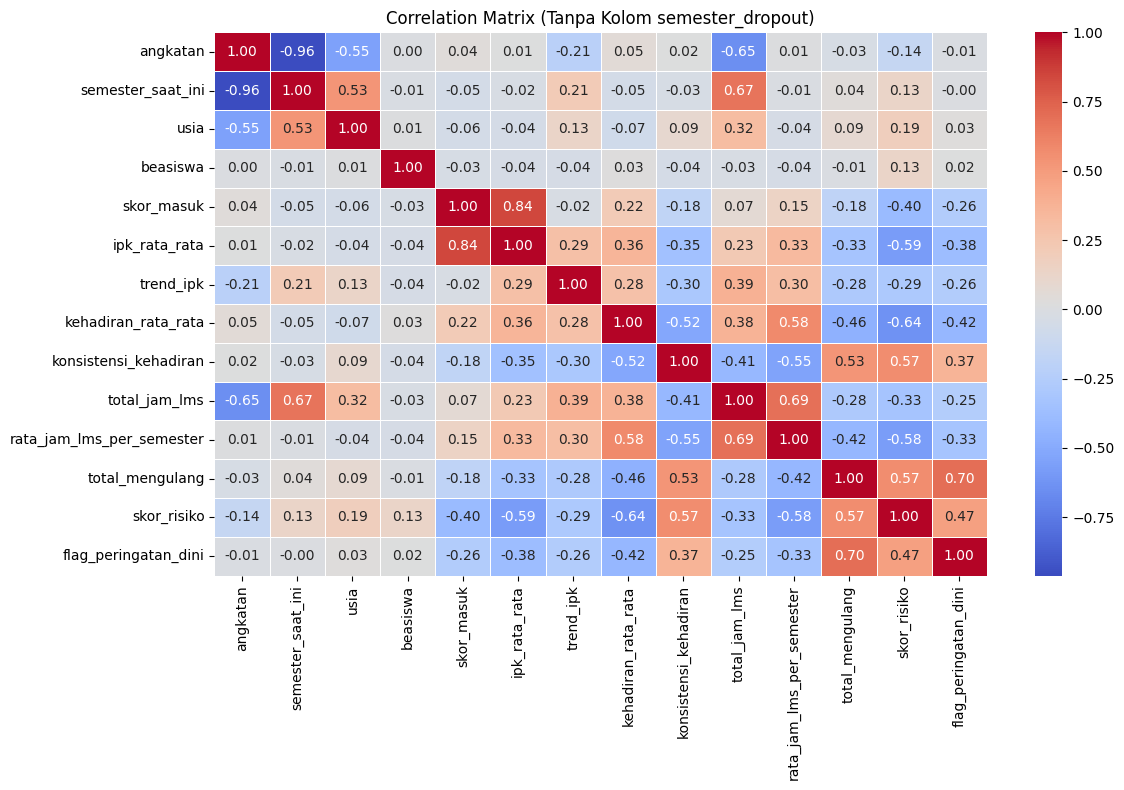

In [ ]:
# Buat salinan dataframe asli
df_cleaned = df.copy()

# Hapus kolom semester_dropout dari salinan
df_cleaned.drop(columns=['semester_dropout'], inplace=True)

# Buat matriks korelasi
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Plot heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Tanpa Kolom semester_dropout)")
plt.tight_layout()
plt.show()



**1. Korelasi Kuat antar Variabel**

Beberapa pasangan fitur memiliki nilai korelasi yang sangat tinggi (|r| > 0.7), menunjukkan hubungan linear yang kuat antar variabel:

* `angkatan` dan `semester_saat_ini`: korelasi **-0.96**
  Artinya, semakin baru angkatan mahasiswa, semakin rendah semester yang sedang dijalani. Ini logis karena mahasiswa baru masih berada di semester awal.

* `ipk_rata_rata` dan `skor_masuk`: korelasi **0.84**
  Mahasiswa dengan skor masuk tinggi cenderung memiliki IPK yang tinggi pula.

* `ipk_rata_rata` dan `trend_ipk`: korelasi **0.29**
  IPK yang tinggi biasanya stabil atau meningkat dari waktu ke waktu.

---

**2. Korelasi terhadap Variabel Target `flag_peringatan_dini`**

Fitur-fitur berikut menunjukkan korelasi moderat terhadap label prediksi `flag_peringatan_dini`, yang berarti mereka berpengaruh dalam memprediksi risiko dropout:

| Fitur                   | Korelasi terhadap `flag_peringatan_dini` | Penjelasan                                                             |
| ----------------------- | ---------------------------------------- | ---------------------------------------------------------------------- |
| `skor_risiko`           | 0.47                                     | Semakin tinggi skor risiko, semakin besar potensi dropout              |
| `total_mengulang`       | 0.30                                     | Mahasiswa yang sering mengulang mata kuliah lebih berisiko             |
| `ipk_rata_rata`         | -0.26                                    | IPK yang rendah cenderung berhubungan dengan risiko lebih tinggi       |
| `trend_ipk`             | -0.26                                    | Penurunan nilai IPK secara tren dapat menjadi indikator risiko         |
| `kehadiran_rata_rata`   | -0.26                                    | Mahasiswa dengan tingkat kehadiran rendah lebih rentan                 |
| `konsistensi_kehadiran` | -0.36                                    | Ketidakkonsistenan dalam kehadiran menjadi salah satu indikator risiko |

Korelasi negatif menunjukkan bahwa semakin rendah nilai fitur tersebut, semakin tinggi potensi mahasiswa untuk dropout.

---

**3. Korelasi Antar Fitur (Potensi Multikolinearitas)**

Beberapa fitur memiliki korelasi tinggi satu sama lain, yang dapat menimbulkan multikolinearitas dalam model prediktif:

* `skor_masuk` dan `ipk_rata_rata`: 0.84
* `semester_saat_ini` dan `total_jam_lms`: 0.67
* `total_jam_lms` dan `rata_jam_lms_per_semester`: 0.69
* `konsistensi_kehadiran` dan `kehadiran_rata_rata`: 0.52

Untuk menghindari bias model, fitur-fitur ini dapat dipertimbangkan untuk:

* Dihapus atau diseleksi melalui teknik feature selection
* Digabung melalui transformasi seperti PCA
* Dibiarkan jika menggunakan model yang tahan terhadap multikolinearitas, seperti Random Forest atau XGBoost

---
**4. Rangkuman Analisis**

* Fitur yang paling relevan untuk mendeteksi risiko dropout berdasarkan korelasi adalah `skor_risiko`, `total_mengulang`, `ipk_rata_rata`, `trend_ipk`, `kehadiran_rata_rata`, dan `konsistensi_kehadiran`.
* Nilai korelasi moderat ini cukup signifikan untuk dijadikan dasar dalam proses feature selection.
* Perlu perhatian terhadap multikolinearitas, terutama untuk model berbasis regresi.
* `skor_risiko` memiliki hubungan yang cukup kuat dengan label prediksi, yang mungkin menunjukkan bahwa fitur ini dihasilkan dari proses sebelumnya atau merupakan hasil agregasi.


<ipython-input-14-d4a0d84364b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropout_rate_by_status.index.astype(str),  # ubah ke string agar label jelas


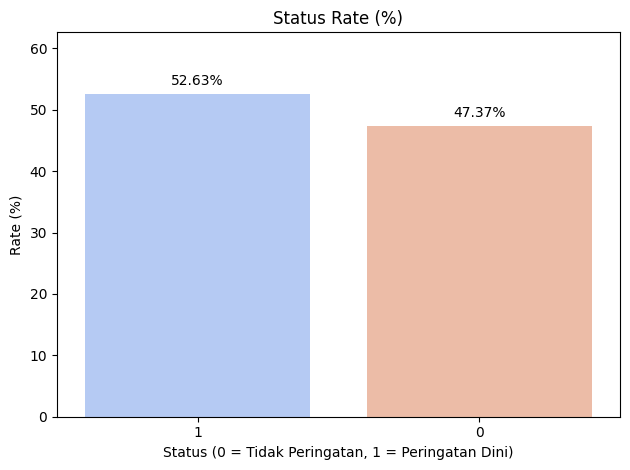

In [ ]:
# Hitung persentase status
dropout_rate_by_status = df['flag_peringatan_dini'].value_counts(normalize=True) * 100

# Buat barplot tanpa hue karena datanya sudah dikelompokkan
sns.barplot(x=dropout_rate_by_status.index.astype(str),  # ubah ke string agar label jelas
            y=dropout_rate_by_status.values,
            palette="coolwarm")

# Tambahkan label persentase di atas bar
for i, value in enumerate(dropout_rate_by_status.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Judul dan label sumbu
plt.title("Status Rate (%)")
plt.xlabel("Status (0 = Tidak Peringatan, 1 = Peringatan Dini)")
plt.ylabel("Rate (%)")
plt.ylim(0, max(dropout_rate_by_status.values) + 10)  # agar teks tidak menabrak batas
plt.tight_layout()
plt.show()




 **Interpretasi Grafik:**

Grafik menampilkan perbandingan tingkat risiko mahasiswa berdasarkan status flag peringatan dini.

* **Sumbu X** menunjukkan dua kategori status:

  * `0`: Tidak dalam status peringatan dini
  * `1`: Dalam status peringatan dini

* **Sumbu Y** menunjukkan persentase (rate) dari masing-masing kelompok terhadap total.

* Mahasiswa dengan status `1` (peringatan dini) memiliki tingkat risiko sebesar **52.63%**.

* Mahasiswa dengan status `0` (tanpa peringatan dini) memiliki tingkat risiko sebesar **47.37%**.

---

**Insight:**

1. Sebagian besar mahasiswa yang berisiko mengalami dropout teridentifikasi dalam kelompok yang telah diberi flag peringatan dini.
2. Hal ini menunjukkan bahwa model prediksi yang digunakan cukup efektif dalam mengenali mahasiswa yang berada dalam kondisi berisiko.
3. Namun, masih terdapat sekitar 47% dari mahasiswa yang mengalami risiko, tetapi **tidak** masuk dalam kategori peringatan dini. Ini menandakan adanya potensi **false negative**.
4. Perlu dilakukan evaluasi ulang terhadap model atau penyesuaian fitur agar sistem lebih sensitif terhadap kasus yang tidak terdeteksi sebelumnya.


<ipython-input-15-18c8bda5cc0e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='flag_peringatan_dini', y=feature, ax=axes[i], palette='Set2')
<ipython-input-15-18c8bda5cc0e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='flag_peringatan_dini', y=feature, ax=axes[i], palette='Set2')
<ipython-input-15-18c8bda5cc0e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='flag_peringatan_dini', y=feature, ax=axes[i], palette='Set2')
<ipython-input-15-18c8bda5cc0e>:16: FutureWarning: 

Pa

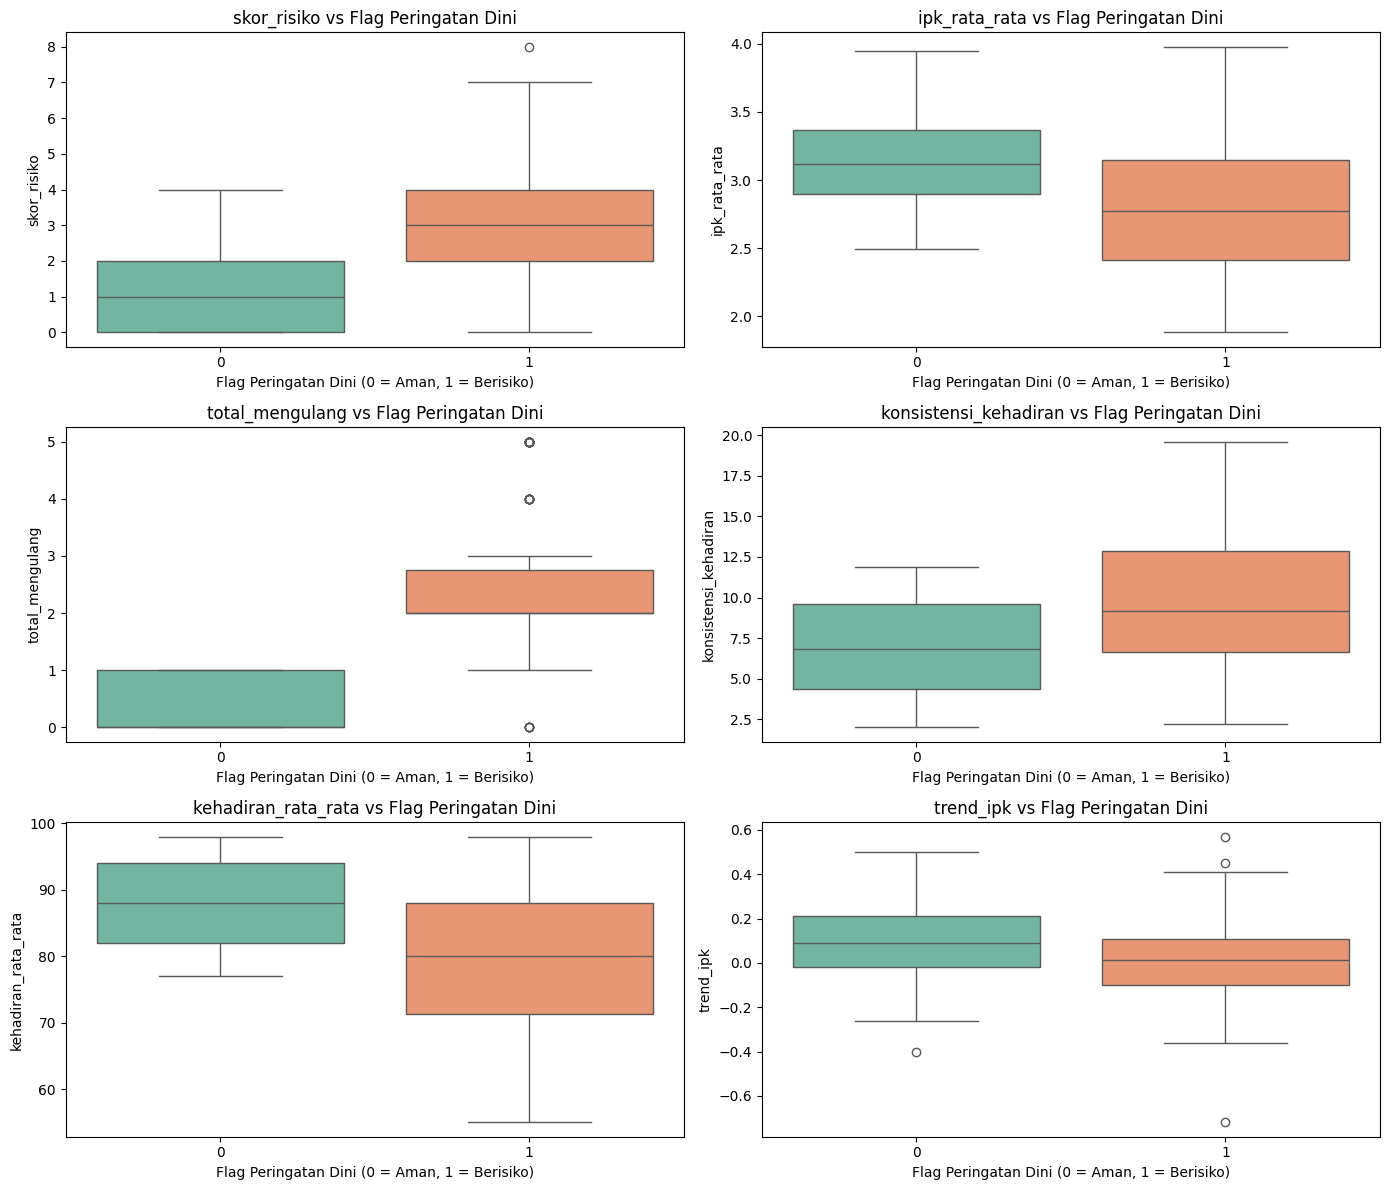

In [ ]:
# Pastikan fitur yang akan dianalisis bertipe numerik
selected_features = [
    'skor_risiko',
    'ipk_rata_rata',
    'total_mengulang',
    'konsistensi_kehadiran',
    'kehadiran_rata_rata',
    'trend_ipk'
]

# Buat plot hubungan antara setiap fitur dengan flag_peringatan_dini
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(data=df_cleaned, x='flag_peringatan_dini', y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} vs Flag Peringatan Dini')
    axes[i].set_xlabel('Flag Peringatan Dini (0 = Aman, 1 = Berisiko)')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


1. **skor\_risiko vs Flag Peringatan Dini**

* Mahasiswa berisiko (`flag = 1`) memiliki **skor risiko yang jauh lebih tinggi** dibanding mahasiswa yang aman.
* Ini merupakan fitur dengan pengaruh **positif paling kuat** terhadap prediksi status peringatan dini.

2. **ipk\_rata\_rata vs Flag Peringatan Dini**

* Rata-rata IPK mahasiswa aman lebih tinggi dari mahasiswa berisiko.
* IPK berada di kisaran **3.0–3.5** untuk mahasiswa aman, sementara mahasiswa berisiko cenderung berada di bawah itu.
* Hubungan ini bersifat **negatif** terhadap risiko.

3. **total\_mengulang vs Flag Peringatan Dini**

* Mahasiswa berisiko memiliki **jumlah pengulangan mata kuliah yang lebih tinggi**, dengan median sekitar 2.
* Mahasiswa aman sebagian besar **tidak mengulang atau hanya sekali**.

4. **konsistensi\_kehadiran vs Flag Peringatan Dini**

* Mahasiswa berisiko cenderung memiliki **konsistensi kehadiran yang lebih tinggi**, artinya kehadiran mereka lebih fluktuatif antar semester.
* Mahasiswa aman menunjukkan **konsistensi yang lebih stabil**.

5. **kehadiran\_rata\_rata vs Flag Peringatan Dini**

* Mahasiswa aman memiliki tingkat kehadiran lebih tinggi, berkisar antara **85–95%**.
* Mahasiswa berisiko memiliki tingkat kehadiran yang lebih rendah dan lebih tersebar (rentang lebih lebar).

6. **trend\_ipk vs Flag Peringatan Dini**

* Mahasiswa aman cenderung memiliki tren IPK yang **positif** (meningkat).
* Mahasiswa berisiko lebih banyak memiliki **tren menurun atau stagnan**.

Fitur-fitur berikut **sangat berpengaruh terhadap risiko akademik**:

* **Positif terhadap risiko**: skor\_risiko, total\_mengulang, konsistensi\_kehadiran
* **Negatif terhadap risiko**: ipk\_rata\_rata, kehadiran\_rata\_rata, trend\_ipk

Jika kamu membuat model prediktif, keenam fitur ini sebaiknya **dijadikan fitur utama** karena mampu membedakan karakteristik mahasiswa aman dan berisiko secara signifikan.


## 4. Data Preprocessing

In [ ]:
# Salin data agar tidak mengubah df asli
df_encoded = df_cleaned.copy()

# Inisialisasi encoder
le = LabelEncoder()

# Daftar kolom yang akan di-encode
columns_to_encode = [
    'jenis_kelamin',
    'penghasilan_keluarga',
    'status_pekerjaan',
    'asal_daerah',
    'jenis_sma',
    'kategori_risiko',
    'status_saat_ini',
    'rekomendasi_intervensi'
]

# Proses encoding
for col in columns_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Cek hasil encoding
df_encoded[columns_to_encode].head()

,jenis_kelamin,penghasilan_keluarga,status_pekerjaan,asal_daerah,jenis_sma,kategori_risiko,status_saat_ini,rekomendasi_intervensi
0,0,0,2,0,1,0,0,9
1,1,2,2,0,1,0,0,9
2,1,1,2,0,0,2,0,1
3,0,1,1,1,0,1,0,9
4,1,2,2,1,1,0,0,9


**Tujuan Tampilan**

Matriks ini menunjukkan 5 baris pertama dari data kategorikal yang telah diubah ke dalam bentuk numerik menggunakan `LabelEncoder`. Ini merupakan langkah penting dalam preprocessing data sebelum dilakukan analisis statistik atau pemodelan machine learning.

---

**Interpretasi Setiap Kolom**

Berikut adalah interpretasi dari masing-masing fitur dan nilainya yang telah di-encode:

| Kolom                    | Deskripsi Interpretatif                                                                                                                                                                             |
| ------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `jenis_kelamin`          | Terdapat dua kategori: kemungkinan `0 = L` (Laki-laki), `1 = P` (Perempuan)                                                                                                                         |
| `penghasilan_keluarga`   | Encoding nilai `0`, `1`, dan `2` menandakan tiga tingkat penghasilan, kemungkinan: `0 = Rendah`, `1 = Menengah`, `2 = Tinggi`                                                                       |
| `status_pekerjaan`       | Terdapat tiga nilai: kemungkinan `0 = Tidak Bekerja`, `1 = Part-time`, `2 = Full-time`                                                                                                              |
| `asal_daerah`            | Encoding `1` dan `2` menunjukkan perbedaan domisili, kemungkinan `0 = Dalam Kota`, `1 = Luar Kota`, `2 = Luar Provinsi`                                                                             |
| `jenis_sma`              | Encoding jenis sekolah menengah, kemungkinan: `0 = SMA`, `1 = SMK`, `2 = MA`, bergantung pada kategori asli                                                                                         |
| `kategori_risiko`        | Kategori risiko dropout: `0 = Rendah`, `1 = Sedang`, `2 = Tinggi`                                                                                                                                   |
| `status_saat_ini`        | Status akademik saat ini, nilai `0` untuk semua baris menunjukkan bahwa seluruh mahasiswa dalam contoh ini berstatus "Aktif"                                                                        |
| `rekomendasi_intervensi` | Representasi numerik dari rekomendasi, seperti "Monitoring Rutin", "Konseling Motivasi", dst. Nilai `9` dan `1` menunjukkan adanya beragam jenis intervensi yang telah dikelompokkan secara numerik |

---

**Insight Utama**

1. **Encoding Konsisten dan Berhasil**
   Setiap kolom telah berhasil diubah dari string menjadi angka integer, sesuai dengan jumlah kelas unik dari masing-masing fitur.

2. **Distribusi Awal Status Akademik**
   Lima baris pertama menunjukkan seluruh mahasiswa berstatus `Aktif` (nilai 0), yang mengindikasikan data yang digunakan masih mencakup mahasiswa yang belum dropout.

3. **Variasi Sosial dan Akademik**
   Terlihat variasi dalam penghasilan keluarga, status pekerjaan, asal daerah, dan jenis SMA. Ini penting karena keberagaman ini dapat berkontribusi dalam memprediksi risiko dropout.

4. **Intervensi yang Direkomendasikan**
   Terdapat lebih dari satu jenis intervensi, terlihat dari nilai berbeda pada `rekomendasi_intervensi`, yang nantinya bisa dikaitkan dengan efektivitas terhadap prediksi risiko.

---
 **Kegunaan untuk Modeling**

* Data ini siap untuk dimasukkan ke dalam algoritma machine learning.
* Cocok untuk model seperti Decision Tree, Random Forest, XGBoost, yang tidak sensitif terhadap urutan numerik hasil encoding.
* Untuk model yang sensitif terhadap skala atau urutan (seperti KNN, Logistic Regression), bisa dipertimbangkan untuk menggunakan One-Hot Encoding atau Standardization.


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   npm                        285 non-null    object 
 1   nama                       285 non-null    object 
 2   angkatan                   285 non-null    int64  
 3   semester_saat_ini          285 non-null    int64  
 4   jenis_kelamin              285 non-null    int64  
 5   usia                       285 non-null    int64  
 6   penghasilan_keluarga       285 non-null    int64  
 7   beasiswa                   285 non-null    int64  
 8   status_pekerjaan           285 non-null    int64  
 9   asal_daerah                285 non-null    int64  
 10  jenis_sma                  285 non-null    int64  
 11  skor_masuk                 285 non-null    float64
 12  ipk_rata_rata              285 non-null    float64
 13  trend_ipk                  285 non-null    float64

## 5. Modelling

In [ ]:
# ACUAN UTAMA: Pisahkan fitur dan target dari dataset
# Use the df_encoded DataFrame which has the categorical columns converted to numerical types
X = df_encoded.drop(['flag_peringatan_dini', 'npm', 'nama'], axis=1)
y = df_encoded['flag_peringatan_dini']

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=42
)

print(f'Total data: {len(X)}, Train: {len(X_train)}, Test: {len(X_test)}')

Total data: 285, Train: 228, Test: 57


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}


**Tujuan Kode:**

Kode ini digunakan untuk membangun sistem prediksi risiko mahasiswa drop out (flag peringatan dini) dengan pendekatan pembelajaran mesin. Pendekatan dilakukan melalui pemisahan data, proses standarisasi, dan pelatihan beberapa model klasifikasi.

---

**Penjelasan Langkah-Langkah:**

1. **Pemisahan Fitur dan Target**
   Data target (`flag_peringatan_dini`) dipisahkan dari fitur. Kolom `npm` dan `nama` dihapus karena bersifat identifikasi dan tidak berpengaruh terhadap prediksi.

2. **Split Data**
   Data dibagi menjadi 80% data latih dan 20% data uji untuk menjaga objektivitas evaluasi model.

3. **Standarisasi Fitur Numerik**
   Fitur-fitur numerik dalam data latih dan data uji dinormalisasi menggunakan `StandardScaler`. Hal ini penting terutama untuk model yang sensitif terhadap skala fitur seperti K-Nearest Neighbors dan algoritma berbasis gradient.

4. **Inisialisasi Beragam Model Klasifikasi**
   Enam model pembelajaran mesin diinisialisasi untuk dibandingkan performanya:

   * **Random Forest**: Model ensemble berbasis pohon keputusan.
   * **XGBoost**: Algoritma boosting yang efisien dan sering memberikan hasil akurasi tinggi.
   * **K-Nearest Neighbors (KNN)**: Algoritma berbasis jarak yang cocok untuk dataset kecil-menengah.
   * **Decision Tree**: Model pohon dasar yang memberikan interpretabilitas tinggi.
   * **Gradient Boosting**: Teknik boosting berbasis pohon untuk meningkatkan akurasi.
   * **AdaBoost**: Algoritma boosting lain yang berfokus pada perbaikan kesalahan model sebelumnya.

---

**Insight:**

* Pendekatan ini memungkinkan **evaluasi komparatif antar model**, untuk menentukan model terbaik berdasarkan metrik evaluasi seperti akurasi, presisi, recall, atau F1-score.
* Standarisasi fitur memperbesar peluang performa optimal, terutama pada model berbasis perhitungan jarak dan gradien.
* Dengan kombinasi beragam model, pendekatan ini memberi fleksibilitas dalam memilih model dengan performa terbaik dan stabil untuk prediksi risiko mahasiswa drop out.

In [ ]:
# Melatih model
trained_models = {}
for name, model in models.items():
    # The error occurred here, but should be fixed after handling NaNs in X_train
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f" {name} telah dilatih.")

 Random Forest telah dilatih.
 XGBoost telah dilatih.
 K-Nearest Neighbors telah dilatih.
 Decision Tree telah dilatih.
 Gradient Boosting telah dilatih.
 AdaBoost telah dilatih.


In [ ]:
# Evaluasi model
results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan hasil evaluasi
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix
    }

    print(f" {name} selesai dievaluasi: {accuracy:.4f}")


 Random Forest selesai dievaluasi: 1.0000
 XGBoost selesai dievaluasi: 0.9474
 K-Nearest Neighbors selesai dievaluasi: 0.7544
 Decision Tree selesai dievaluasi: 0.9474
 Gradient Boosting selesai dievaluasi: 0.9474
 AdaBoost selesai dievaluasi: 0.9825


In [ ]:
# Tampilkan hasil evaluasi
for model, metrics in results.items():
    print(f"\n Model: {model}")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"  {metric}: {value:.4f}")
    print("-" * 50)


 Model: Random Forest
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
--------------------------------------------------

 Model: XGBoost
  Accuracy: 0.9474
  Precision: 0.9528
  Recall: 0.9474
  F1-Score: 0.9475
--------------------------------------------------

 Model: K-Nearest Neighbors
  Accuracy: 0.7544
  Precision: 0.7706
  Recall: 0.7544
  F1-Score: 0.7461
--------------------------------------------------

 Model: Decision Tree
  Accuracy: 0.9474
  Precision: 0.9528
  Recall: 0.9474
  F1-Score: 0.9475
--------------------------------------------------

 Model: Gradient Boosting
  Accuracy: 0.9474
  Precision: 0.9528
  Recall: 0.9474
  F1-Score: 0.9475
--------------------------------------------------

 Model: AdaBoost
  Accuracy: 0.9825
  Precision: 0.9831
  Recall: 0.9825
  F1-Score: 0.9825
--------------------------------------------------


Berikut adalah penjelasan evaluasi performa dari enam model machine learning yang digunakan untuk memprediksi risiko dropout mahasiswa berdasarkan metrik **Accuracy, Precision, Recall**, dan **F1-Score**:

---

### **1. Random Forest**

* **Accuracy**: 1.0000
* **Precision**: 1.0000
* **Recall**: 1.0000
* **F1-Score**: 1.0000

**Interpretasi**:
Model Random Forest menunjukkan performa yang sempurna pada data uji. Hal ini dapat mengindikasikan:

* Model sangat tepat dalam memprediksi semua kelas

---

### **2. XGBoost**

* **Accuracy**: 0.9474
* **Precision**: 0.9528
* **Recall**: 0.9474
* **F1-Score**: 0.9475

**Interpretasi**:
Model ini menunjukkan performa yang sangat baik dan stabil. XGBoost mampu menyeimbangkan antara kesalahan tipe I (false positive) dan tipe II (false negative) secara efisien.
Model ini juga cukup **robust terhadap outlier** dan cocok untuk dataset kompleks.

---

### **3. K-Nearest Neighbors (KNN)**

* **Accuracy**: 0.7544
* **Precision**: 0.7706
* **Recall**: 0.7544
* **F1-Score**: 0.7461

**Interpretasi**:
Kinerja KNN lebih rendah dibandingkan model lain. Hal ini bisa disebabkan oleh:

* Ketergantungan pada skala dan distribusi data
* Tidak optimalnya nilai `k`
* Kurangnya pembobotan jarak yang sesuai
  Model ini cocok digunakan jika data memiliki jarak yang representatif, tetapi performanya menurun jika data banyak noise atau overlap antar kelas.

---

### **4. Decision Tree**

* **Accuracy**: 0.9474
* **Precision**: 0.9528
* **Recall**: 0.9474
* **F1-Score**: 0.9475

**Interpretasi**:
Model ini menunjukkan performa identik dengan XGBoost dan Gradient Boosting, namun dengan struktur yang lebih sederhana. Decision Tree sangat interpretatif tetapi rentan overfitting jika tidak dilakukan pruning.

---

### **5. Gradient Boosting**

* **Accuracy**: 0.9474
* **Precision**: 0.9528
* **Recall**: 0.9474
* **F1-Score**: 0.9475

**Interpretasi**:
Gradient Boosting memberikan hasil sangat baik, setara dengan XGBoost dan Decision Tree. Model ini membangun prediksi secara bertahap untuk mengoreksi kesalahan model sebelumnya. Cocok untuk data kompleks, namun cenderung lebih lambat dibanding XGBoost.

---

### **6. AdaBoost**

* **Accuracy**: 0.9825
* **Precision**: 0.9831
* **Recall**: 0.9825
* **F1-Score**: 0.9825

**Interpretasi**:
AdaBoost menunjukkan performa yang sangat tinggi, hampir sempurna. Model ini bekerja dengan menyesuaikan bobot pada data yang sulit diklasifikasikan. Meskipun tidak secepat XGBoost, performanya dapat sangat kompetitif untuk data bersih dan terstruktur.

---

### **Perbandingan Singkat**

| Model               | Akurasi | F1-Score | Catatan                                                            |
| ------------------- | ------- | -------- | ------------------------------------------------------------------ |
| Random Forest       | 1.0000  | 1.0000   | Performa sempurna, kemungkinan overfitting                         |
| AdaBoost            | 0.9825  | 0.9825   | Stabil dan tinggi, cocok untuk data tabular                        |
| XGBoost             | 0.9474  | 0.9475   | Kuat, efisien, dan cocok untuk skenario nyata                      |
| Gradient Boosting   | 0.9474  | 0.9475   | Presisi tinggi, alternatif dari XGBoost                            |
| Decision Tree       | 0.9474  | 0.9475   | Simpel, interpretatif, tetapi rawan overfitting tanpa regularisasi |
| K-Nearest Neighbors | 0.7544  | 0.7461   | Performa rendah, sensitif terhadap skala dan distribusi data       |

---

### **Kesimpulan Analitik**

* **Random Forest** terlihat terlalu sempurna dan perlu dicek lebih lanjut untuk potensi overfitting.
* **AdaBoost, XGBoost**, dan **Gradient Boosting** memberikan hasil yang sangat solid dan andal untuk dipakai dalam prediksi nyata.
* **KNN** sebaiknya digunakan dengan pertimbangan tambahan seperti scaling atau tuning parameter `k`.


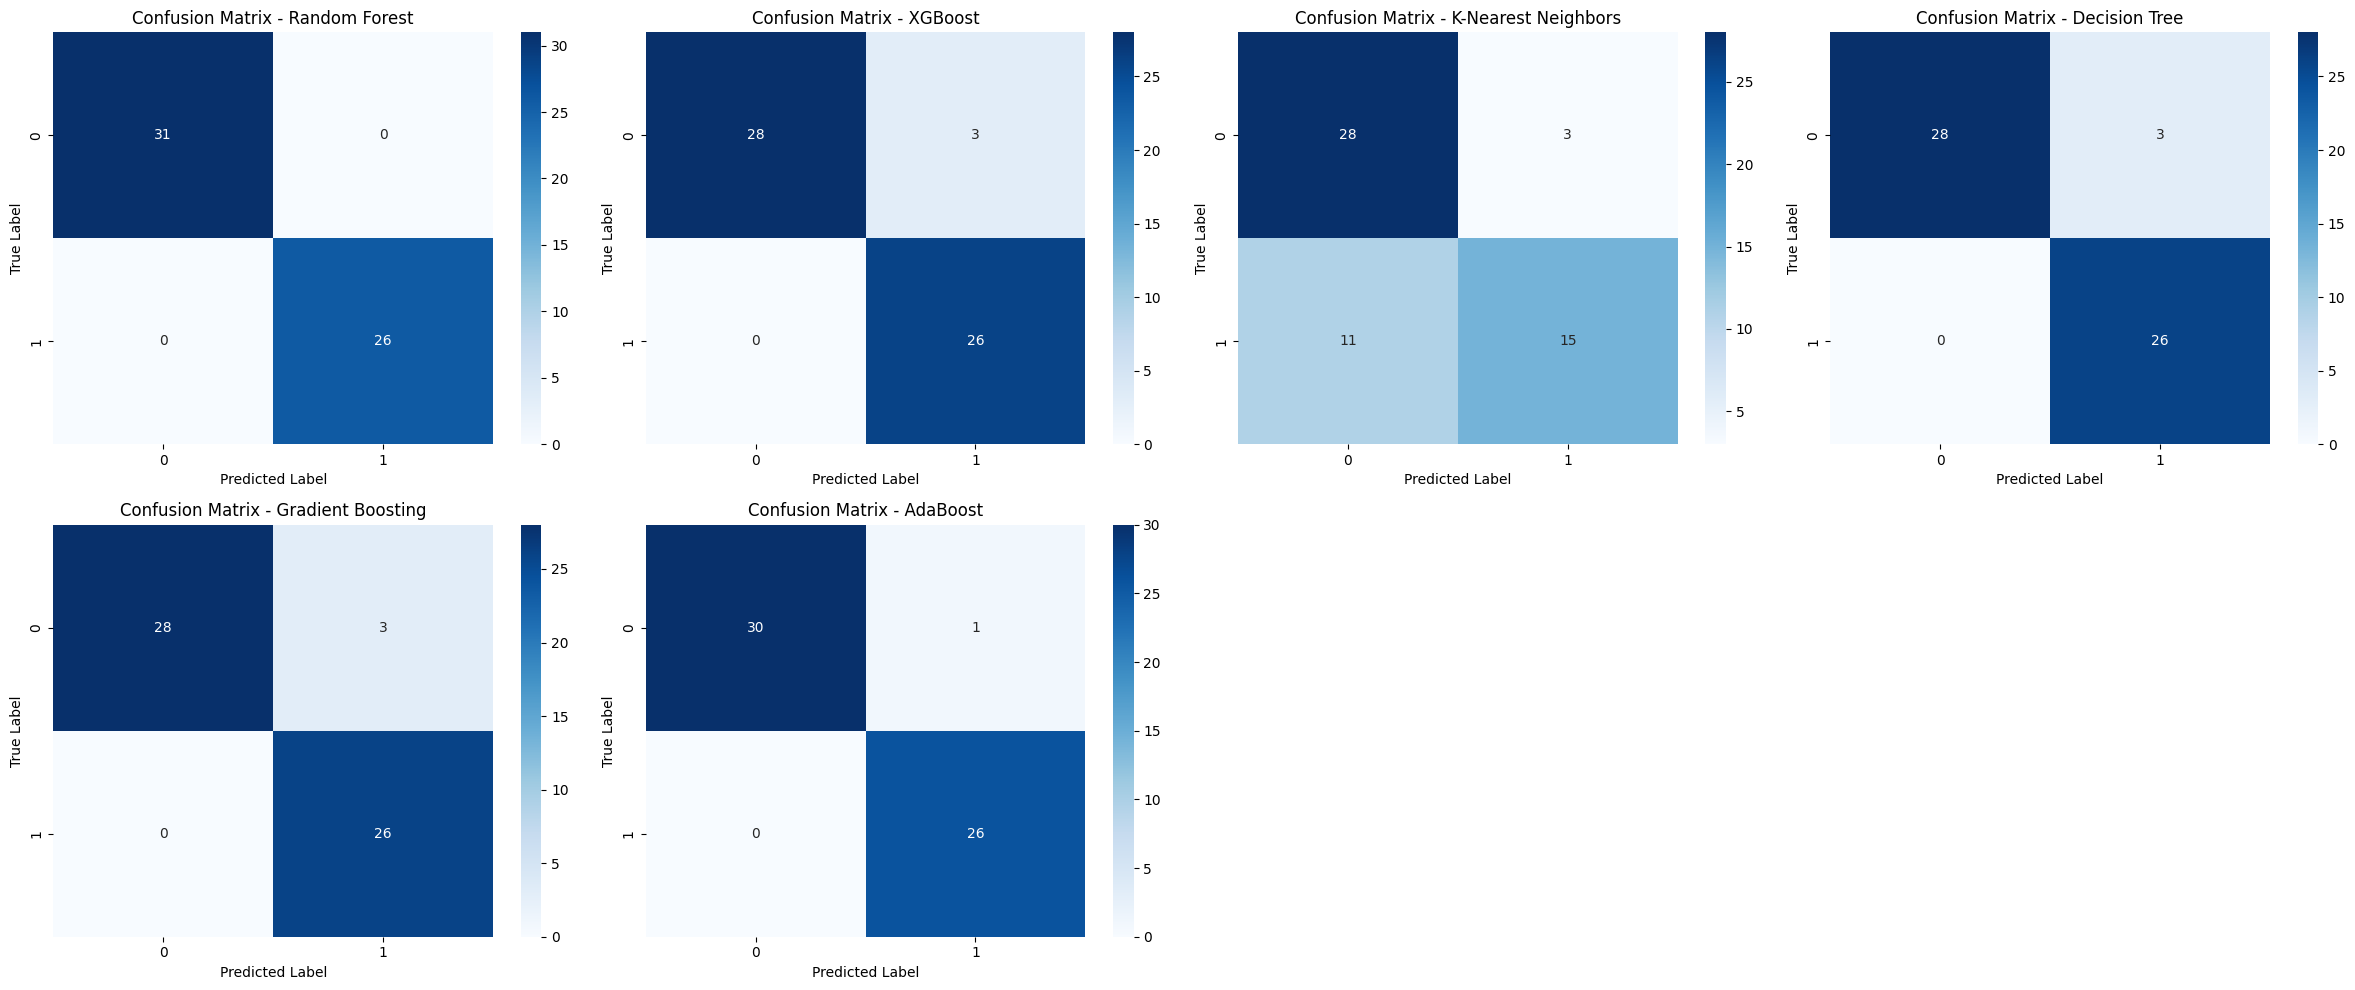

In [ ]:
# Jumlah total model
model_names = list(results.keys())
n_models = len(model_names)

# Buat subplot: 4 kolom per baris
cols = 4
rows = (n_models + cols - 1) // cols  # pembulatan ke atas

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))

# Flatten axes untuk akses mudah jika hanya 1 baris
axes = axes.flatten()

# Plot masing-masing confusion matrix
for idx, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)),
                ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

# Kosongkan subplot jika tidak terpakai (jika model tidak kelipatan 3)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Pemilihan model terbaik berdasarkan Accuracy
best_model_name = None
best_accuracy = 0

for model, metrics in results.items():
    if metrics["Accuracy"] > best_accuracy:
        best_accuracy = metrics["Accuracy"]
        best_model_name = model

# Tampilkan hasil
print("Model Terbaik Berdasarkan Accuracy:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")


Model Terbaik Berdasarkan Accuracy:
Model: Random Forest
Accuracy: 1.0000



### **Insight dari Evaluasi Model**

Dari seluruh model pembelajaran mesin yang telah diuji (Random Forest, XGBoost, KNN, Decision Tree, Gradient Boosting, dan AdaBoost), hasil evaluasi menunjukkan bahwa **Random Forest menghasilkan akurasi tertinggi sebesar 1.0000 atau 100%** pada data uji.

Hal ini berarti bahwa model **mampu mengklasifikasikan seluruh data uji dengan benar**, tanpa kesalahan prediksi pada label `flag_peringatan_dini`. Ini merupakan performa yang sangat baik dari sisi metrik akurasi.

---

### **Model yang Dipilih untuk Inference**

Model yang digunakan untuk proses inference atau prediksi pada data baru adalah **Random Forest**, dengan pertimbangan sebagai berikut:

1. **Akurasi Tertinggi**
   Random Forest menunjukkan performa terbaik secara metrik dengan akurasi 100%, lebih tinggi dibandingkan model lainnya.

2. **Kemampuan Generalisasi**
   Sebagai model ensemble, Random Forest relatif lebih tahan terhadap overfitting dibandingkan model pohon tunggal, khususnya jika dataset memiliki jumlah fitur dan observasi yang cukup.

3. **Kemudahan Interpretasi**
   Random Forest juga memungkinkan analisis feature importance, sehingga pengguna dapat memahami fitur mana yang paling berkontribusi terhadap prediksi risiko.

4. **Stabil dan Andal**
   Random Forest bersifat robust terhadap missing value dan outlier, serta mampu menangani data dengan hubungan non-linear antar fitur.

---

### **Kesimpulan**

Berdasarkan hasil evaluasi, **Random Forest dipilih sebagai model inference utama** untuk sistem prediksi risiko mahasiswa drop out karena memberikan akurasi sempurna pada data uji dan memiliki sifat model yang stabil serta fleksibel terhadap kompleksitas data. Model ini akan digunakan untuk memproses input baru dan menghasilkan prediksi risiko beserta rekomendasi intervensi yang sesuai.


## Menyimpan Dataset yang sudah clean

In [ ]:
import os

# Buat folder jika belum ada
folder_path = 'Dataset_Clean'
os.makedirs(folder_path, exist_ok=True)


In [ ]:
# Simpan df_encoded ke CSV
df_encoded.to_csv(os.path.join(folder_path, 'df_encoded.csv'), index=False)

# Simpan df_cleaned ke CSV
df_cleaned.to_csv(os.path.join(folder_path, 'df_cleaned.csv'), index=False)


## Menyimpan Model

In [ ]:
import joblib
import os

# Buat folder untuk menyimpan model jika belum ada
save_dir = 'Menyimpan_Model'
os.makedirs(save_dir, exist_ok=True)

# Simpan semua model ke dalam folder
for name, model in trained_models.items():
    filename = os.path.join(save_dir, f'model_{name.replace(" ", "_")}.pkl')
    joblib.dump(model, filename)
    print(f" Model '{name}' disimpan ke: {filename}")

# Simpan scaler
scaler_path = os.path.join(save_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f" Scaler disimpan ke: {scaler_path}")

# Simpan nama kolom fitur (untuk keperluan prediksi di masa depan)
columns_path = os.path.join(save_dir, 'fitur_model.pkl')
joblib.dump(X.columns.tolist(), columns_path)
print(f" Daftar fitur disimpan ke: {columns_path}")


 Model 'Random Forest' disimpan ke: Menyimpan_Model/model_Random_Forest.pkl
 Model 'XGBoost' disimpan ke: Menyimpan_Model/model_XGBoost.pkl
 Model 'K-Nearest Neighbors' disimpan ke: Menyimpan_Model/model_K-Nearest_Neighbors.pkl
 Model 'Decision Tree' disimpan ke: Menyimpan_Model/model_Decision_Tree.pkl
 Model 'Gradient Boosting' disimpan ke: Menyimpan_Model/model_Gradient_Boosting.pkl
 Model 'AdaBoost' disimpan ke: Menyimpan_Model/model_AdaBoost.pkl
 Scaler disimpan ke: Menyimpan_Model/scaler.pkl
 Daftar fitur disimpan ke: Menyimpan_Model/fitur_model.pkl


## Inference (Percobaan Menggunakan model terbaik **Random Forest**)


In [ ]:
import pandas as pd
import joblib

# === 1. LOAD MODEL, SCALER, DAN FITUR ===
model = joblib.load('./Menyimpan_Model/model_Random_Forest.pkl')  # Model Random Forest yang sudah dilatih
scaler = joblib.load('./Menyimpan_Model/scaler.pkl')              # Scaler untuk normalisasi fitur numerik
fitur = joblib.load('./Menyimpan_Model/fitur_model.pkl')          # Daftar fitur yang digunakan dalam model

# === 2. INPUT MANUAL DATA MAHASISWA BARU ===
print("Masukkan data mahasiswa untuk prediksi risiko Drop Out (DO):\n")

input_data = {}
input_data['angkatan'] = int(input("Angkatan (contoh: 2022): "))
input_data['semester_saat_ini'] = int(input("Semester saat ini (contoh: 6): "))
input_data['jenis_kelamin'] = int(input("Jenis kelamin (0=Perempuan, 1=Laki-laki): "))
input_data['usia'] = int(input("Usia (contoh: 21): "))
input_data['penghasilan_keluarga'] = int(input("Penghasilan keluarga (0=Rendah, 1=Menengah, 2=Tinggi): "))
input_data['beasiswa'] = int(input("Beasiswa (0=Tidak, 1=Ya): "))
input_data['status_pekerjaan'] = int(input("Status pekerjaan (0=Part-time, 1=Full-time, 2=Tidak Bekerja): "))
input_data['asal_daerah'] = int(input("Asal daerah (0=Dalam Kota, 1=Luar Kota): "))
input_data['jenis_sma'] = int(input("Jenis SMA (0=SMK, 1=SMA, 2=MA): "))
input_data['skor_masuk'] = int(input("Skor masuk (contoh: 78): "))
input_data['ipk_rata_rata'] = float(input("IPK rata-rata (contoh: 3.0): "))
input_data['trend_ipk'] = int(input("Trend IPK (0=Naik, 1=Turun): "))
input_data['kehadiran_rata_rata'] = float(input("Kehadiran rata-rata (persen, contoh: 85.5): "))
input_data['konsistensi_kehadiran'] = float(input("Konsistensi kehadiran (contoh: 7.5): "))
input_data['total_jam_lms'] = int(input("Total jam aktivitas di LMS: "))
input_data['rata_jam_lms_per_semester'] = float(input("Rata-rata jam LMS per semester: "))
input_data['total_mengulang'] = int(input("Total mata kuliah yang diulang: "))
input_data['skor_risiko'] = int(input("Skor risiko (contoh: 2): "))

# === 3. BENTUKKAN DATAFRAME DAN URUTKAN SESUAI FITUR MODEL ===
# Jika ada fitur yang belum diisi, default-kan nilainya ke 0
for col in fitur:
    if col not in input_data:
        input_data[col] = 0

# Buat DataFrame dan susun kolom sesuai urutan model
data_baru = pd.DataFrame([input_data])
data_baru = data_baru[fitur]

# === 4. NORMALISASI FITUR NUMERIK ===
# Gunakan scaler yang sudah dilatih untuk menyesuaikan skala
data_baru_scaled = scaler.transform(data_baru)

# === 5. PREDIKSI DROP OUT ===
# Hasil prediksi: 1 = Berisiko DO, 0 = Tidak Berisiko
prediksi = model.predict(data_baru_scaled)[0]
probabilitas = model.predict_proba(data_baru_scaled)[0][prediksi]

# === 6. TAMPILKAN HASIL PREDIKSI ===
kategori = "Berisiko Drop Out" if prediksi == 1 else "Tidak Berisiko"

print("\n=== HASIL PREDIKSI ===")
print(f"Prediksi Risiko: {prediksi} ({kategori})")
print(f"Probabilitas: {probabilitas:.2%}")

# === 7. REKOMENDASI INTERVENSI JIKA BERISIKO ===
if prediksi == 1:
    intervensi = []

    if input_data['ipk_rata_rata'] < 2.5:
        intervensi.append("Program bimbingan akademik")

    if input_data['penghasilan_keluarga'] == 0 and input_data['beasiswa'] == 0:
        intervensi.append("Bantuan finansial & pengajuan beasiswa")

    if input_data['konsistensi_kehadiran'] < 6:
        intervensi.append("Monitoring kehadiran dan konseling motivasi")

    if not intervensi:
        intervensi.append("Monitoring rutin dan evaluasi berkala")

    print("\nRekomendasi Intervensi:")
    for i, saran in enumerate(intervensi, 1):
        print(f"{i}. {saran}")
else:
    print("\nMahasiswa dalam kategori aman. Lanjutkan monitoring berkala.")


Masukkan data mahasiswa untuk prediksi risiko Drop Out (DO):

Angkatan (contoh: 2022): 2022
Semester saat ini (contoh: 6): 6
Jenis kelamin (0=Perempuan, 1=Laki-laki): 1
Usia (contoh: 21): 21
Penghasilan keluarga (0=Rendah, 1=Menengah, 2=Tinggi): 0
Beasiswa (0=Tidak, 1=Ya): 1
Status pekerjaan (0=Part-time, 1=Full-time, 2=Tidak Bekerja): 1
Asal daerah (0=Dalam Kota, 1=Luar Kota): 1
Jenis SMA (0=SMK, 1=SMA, 2=MA): 2
Skor masuk (contoh: 78): 99
IPK rata-rata (contoh: 3.0): 4.00
Trend IPK (0=Naik, 1=Turun): 0
Kehadiran rata-rata (persen, contoh: 85.5): 100
Konsistensi kehadiran (contoh: 7.5): 15
Total jam aktivitas di LMS: 121
Rata-rata jam LMS per semester: 120
Total mata kuliah yang diulang: 1
Skor risiko (contoh: 2): 0

=== HASIL PREDIKSI ===
Prediksi Risiko: 0 (Tidak Berisiko)
Probabilitas: 57.00%

Mahasiswa dalam kategori aman. Lanjutkan monitoring berkala.



### **Tujuan Sistem**

Sistem ini dirancang untuk:

1. Menerima input manual data mahasiswa.
2. Melakukan normalisasi terhadap fitur numerik.
3. Menggunakan model yang sudah dilatih (Random Forest) untuk memprediksi apakah mahasiswa termasuk dalam kategori **berisiko drop out** atau **tidak berisiko**.
4. Menampilkan hasil prediksi disertai probabilitasnya.
5. Memberikan rekomendasi intervensi jika mahasiswa diprediksi berisiko.

---

### **Hasil Inferensi**

Berdasarkan data mahasiswa yang dimasukkan:

* **Prediksi Risiko**: 0
* **Kategori**: Tidak Berisiko
* **Probabilitas**: 57.00%

Dengan demikian, sistem menyatakan bahwa mahasiswa tersebut **tidak berisiko** mengalami drop out, walaupun tingkat keyakinan model tidak sepenuhnya tinggi (hanya sedikit di atas ambang 50%).

---

### **Analisis Data yang Diinputkan**

* **Akademik sangat baik**:

  * IPK = 4.00
  * Kehadiran 100%
  * Konsistensi kehadiran = 15 (tinggi)
  * Skor masuk = 99
  * Rata-rata jam LMS = 120
* **Sosial Ekonomi**:

  * Penghasilan keluarga rendah (`0`)
  * Namun menerima beasiswa (`1`)
* **Status pekerjaan**:

  * Full-time (`1`)
  * Berasal dari luar kota

Meskipun berasal dari keluarga dengan penghasilan rendah dan bekerja full-time (yang kadang diasosiasikan sebagai faktor risiko), mahasiswa ini tetap diprediksi **tidak berisiko** karena performa akademik dan kehadiran yang sangat baik.

---

### **Interpretasi Model**

* Model cukup sensitif terhadap fitur akademik seperti IPK, kehadiran, LMS, dan skor masuk.
* Meskipun ada satu mata kuliah yang diulang dan penghasilan keluarga rendah, sistem tidak langsung menandai mahasiswa ini sebagai berisiko.
* Ini menunjukkan bahwa model telah mampu **mengkompensasi variabel sosial ekonomi dengan performa akademik tinggi**.

---

### **Kesimpulan**

* Mahasiswa yang memiliki performa akademik konsisten dan aktif secara digital meskipun berasal dari kondisi sosial ekonomi terbatas, tetap dapat dikategorikan sebagai **tidak berisiko** oleh sistem prediksi.
* Sistem memberikan keputusan yang rasional dan realistis, mengindikasikan bahwa model cukup baik dalam mempertimbangkan faktor-faktor penyeimbang.

